# Text Processing tutorial

Material adapted from: https://github.com/siddhantmaharana/NLP101/

In [1]:
## Importing Libraries
import numpy as np
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
text = open('data/104586.pdf.txt','r').read()

In [3]:
print(text[:1000])

Case: 1:10-cv-07031 Document #: 1 Filed: 11/01/10 Page 1 of 22 PageID #:1

UNITED STATES DISTRICT COURT
NORTHERN DISTRICT OF ILLINOIS

BOCA RATON FIREFIGHTERS' AND	
POLICE PENSION FUND, Individually and ) No.
on Behalf of All Others Similarly Situated,	

)

)

CLASS ACTION

DEMAND FOR JURY TRIAL

Plaintiff,	

vs.	

DEVRY INC., DANIEL HAMBURGER,	
RICHARD M. GUNST and DAVID J.	
PAULDINE,	

Defendants.	

)

)

)
)
)

)

CLASS ACTION COMPLAINT FOR VIOLATIONS OF THE SECURITIES LAWS 

JURISDICTION AND VENUE

1.

Jurisdiction is conferred by §27 of the Securities Exchange Act of 1934 ("1934 Act").

The claims asserted herein arise under §§10(b) and 20(a) of the 1934 Act, 15 U.S.C. §§78j(b) and

78t(a), and U.S. Securities and Exchange Commission ("SEC") Rule lOb-5, 17 C.F.R. §240. lOb-5.

2.

Venue is proper in this District pursuant to §27 of the 1934 Act. Many of the false

and misleading statements were made in or issued from this District.

3.

DeVry Inc.'s ("DeVry" or the "Company") prin

## 2. Removing special characters and stopwords(using NLTK)

In [4]:
import nltk
from nltk.corpus import words as english_words, stopwords
import re

## replacing the newlines and extra spaces
corpus = text.replace('\n', ' ').replace('\r', '').replace('  ',' ').lower()

## removing everything except alphabets
corpus_sans_symbols = re.sub('[^a-zA-Z \n]', '', corpus)

## removing stopwords
stop_words = set(w.lower() for w in stopwords.words())

corpus_sans_symbols_stopwords = ' '.join(filter(lambda x: x.lower() not in stop_words, corpus_sans_symbols.split()))

In [5]:
print (corpus_sans_symbols_stopwords[:1000])

case cv document filed page pageid united states district court northern district illinois boca raton firefighters police pension fund individually behalf others similarly situated class action demand jury trial plaintiff vs devry inc daniel hamburger richard gunst david pauldine defendants class action complaint violations securities laws jurisdiction venue jurisdiction conferred securities exchange act act claims asserted herein arise b act usc jb us securities exchange commission sec rule lob cfr lob venue proper district pursuant act many false misleading statements made issued district devry incs devry company principal executive offices located highland parkway downers grove illinois connection acts alleged complaint defendants directly indirectly used means instrumentalities interstate commerce including limited mails interstate telephone communications facilities national securities markets case cv document filed page pageid introduction securities class action behalf persons p

## 3. Stemming and Lemmatizing(using NLTK)

Now that we got rid of the unnecessary characters in the text, we can focus on the words and try to represent them in a more general and standardized format

**Stemming:**  Stemming is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.


**Lemmatization:** Lemmatization, on the other hand, is an organized & step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

In [6]:
from nltk.stem import PorterStemmer
stemmer=nltk.PorterStemmer()
corpus_stemmed = ' ' .join (map(lambda str: stemmer.stem(str), corpus_sans_symbols_stopwords.split()))
print (corpus_stemmed[:1000])

case cv document file page pageid unit state district court northern district illinoi boca raton firefight polic pension fund individu behalf other similarli situat class action demand juri trial plaintiff vs devri inc daniel hamburg richard gunst david pauldin defend class action complaint violat secur law jurisdict venu jurisdict confer secur exchang act act claim assert herein aris b act usc jb us secur exchang commiss sec rule lob cfr lob venu proper district pursuant act mani fals mislead statement made issu district devri inc devri compani princip execut offic locat highland parkway downer grove illinoi connect act alleg complaint defend directli indirectli use mean instrument interst commerc includ limit mail interst telephon commun facil nation secur market case cv document file page pageid introduct secur class action behalf person purchas otherwis acquir common stock devri octob august inclus class period devri certain offic andor director violat act claim assert devri certai

### Checking the word distribution in the document 

Now that we have a relatively cleaner corpus, lets try to vizualize the **top occuring terms** in the corpus.


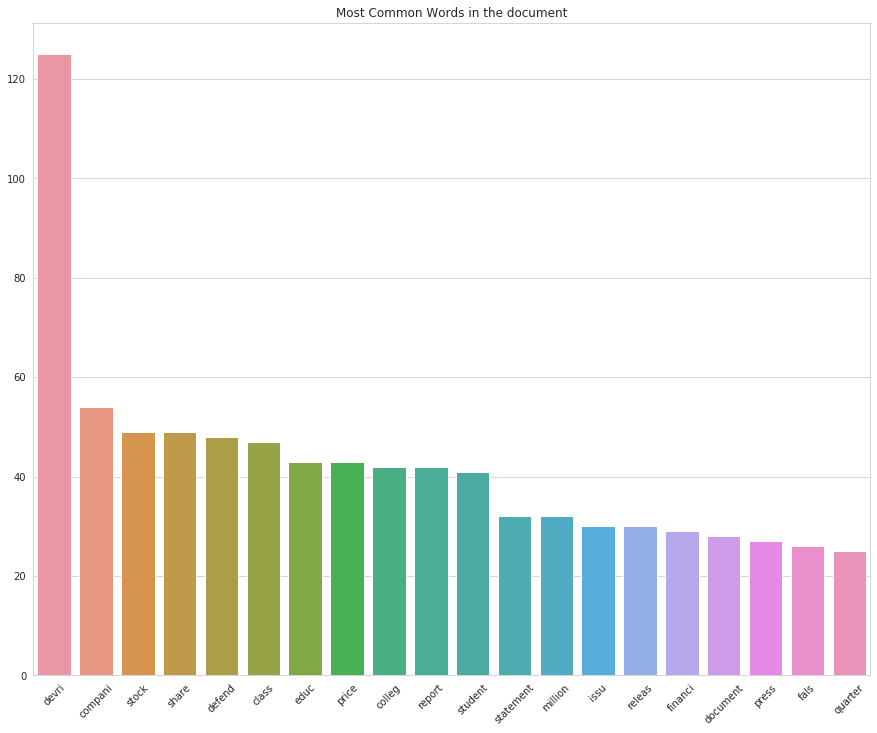

In [7]:
# Plot top 20 frequent words
from collections import Counter
word_freq = Counter(corpus_stemmed.split(" "))

import seaborn as sns
sns.set_style("whitegrid")
common_words = [word[0] for word in word_freq.most_common(20)]
common_counts = [word[1] for word in word_freq.most_common(20)]


plt.figure(figsize=(15, 12))

sns_bar = sns.barplot(x=common_words, y=common_counts)
sns_bar.set_xticklabels(common_words, rotation=45)
plt.title('Most Common Words in the document')
plt.show()

## Introducing Spacy

spaCy by explosion.ai is a library for advanced Natural Language Processing in Python and Cython. spaCy comes with pre-trained statistical models and word vectors, and currently supports tokenization for 20+ languages. It features the fastest syntactic parser in the world, convolutional neural network models for tagging, parsing and named entity recognition and easy deep learning integration. It's commercial open-source software, released under the MIT licence.

More can be found [here](https://spacy.io/usage/)

### Spacy features

1. **Tokenization:** Segmenting text into words, punctuations marks etc. 
2. **Dependency Parsing:** Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.
3. **Lemmatization:** Assigning the base forms of words. For example, the lemma of "was" is "be", and the lemma of "rats" is "rat".
4. **Sentence Boundary Detection (SBD):**Finding and segmenting individual sentences.
5. **Named Entity Recognition (NER):** Labelling named "real-world" objects, like persons, companies or locations.
6. **Part-of-speech (POS) Tagging:** Assigning word types to tokens, like verb or noun.

We can download other language models by running a code like below in your shell or terminal

`
python -m spacy download en_core_web_sm
`
#### A simple example in SPACY

In [8]:
import spacy
## Spacy example 
nlp = spacy.load('en')

doc = nlp("Porto is an amazing city, but Lisbon is sunnier")
for token in doc:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.pos_,
        token.tag_
    ))


Porto	0	Porto	False	PROPN	NNP
is	6	be	False	AUX	VBZ
an	9	an	False	DET	DT
amazing	12	amazing	False	ADJ	JJ
city	20	city	False	NOUN	NN
,	24	,	True	PUNCT	,
but	26	but	False	CCONJ	CC
Lisbon	30	Lisbon	False	PROPN	NNP
is	37	be	False	AUX	VBZ
sunnier	40	sunny	False	ADJ	JJR


## Preprocessing in Spacy

The object “nlp” is used to create documents, access linguistic annotations and different nlp properties.

The document is now part of spacy.english model’s class and is associated with a number of features and properties.

We would take the text for the first document and pass it to the spacy's nlp object. Now doc contains various linguistic features which can be accesses quite easily.

## Spacy operation in just a single line!

In [9]:
## passing our text into spacy
doc = nlp(text)

## filtering stopwords, punctuations, checking for alphabets and capturing the lemmatized text
spacy_tokens = [token.lemma_ for token in doc if token.is_stop != True \
                and token.is_punct != True and token.is_alpha ==True]

In [10]:
print(spacy_tokens[:100])

['case', 'Document', 'file', 'page', 'PageID', 'UNITED', 'STATES', 'district', 'court', 'NORTHERN', 'DISTRICT', 'ILLINOIS', 'boca', 'raton', 'firefighter', 'POLICE', 'pension', 'FUND', 'Individually', 'Behalf', 'similarly', 'Situated', 'class', 'action', 'demand', 'jury', 'trial', 'Plaintiff', 'DEVRY', 'INC', 'DANIEL', 'HAMBURGER', 'RICHARD', 'GUNST', 'DAVID', 'PAULDINE', 'Defendants', 'class', 'action', 'complaint', 'violation', 'security', 'laws', 'jurisdiction', 'venue', 'jurisdiction', 'confer', 'Securities', 'Exchange', 'Act', 'Act', 'claim', 'assert', 'arise', 'Act', 'Securities', 'Exchange', 'Commission', 'SEC', 'rule', 'venue', 'proper', 'District', 'pursuant', 'Act', 'false', 'misleading', 'statement', 'issue', 'District', 'DeVry', 'DeVry', 'Company', 'principal', 'executive', 'office', 'locate', 'Highland', 'Parkway', 'Downers', 'Grove', 'Illinois', 'connection', 'act', 'allege', 'complaint', 'defendant', 'directly', 'indirectly', 'mean', 'instrumentality', 'interstate', 'com

## Plotting top 20 words 

In just one line, we were able to convert the entire text file to a list of **Tokens**. These tokens are individual words freed from the junk and the stopwords which occur in the English lexicon.

In [11]:
word_freq_spacy = Counter(spacy_tokens)

# Plot top 20 frequent words

sns.set_style("whitegrid")
common_words = [word[0] for word in word_freq_spacy.most_common(20)]
common_counts = [word[1] for word in word_freq_spacy.most_common(20)]


plt.figure(figsize=(15, 12))

sns_bar = sns.barplot(x=common_words, y=common_counts)
sns_bar.set_xticklabels(common_words, rotation=45)
plt.title('Most Common Words in the document')
plt.show()

<h1><center>Part B: Feature Generation/Document Representation</center></h1>

## 1. POS tagging and Dependency Parsing

Part-of-speech tagging is the process of assigning grammatical properties (e.g. noun, verb, adverb, adjective etc.) to words. Words that share the same POS tag tend to follow a similar syntactic structure and are useful in rule-based processes.

spaCy features a fast and accurate syntactic **dependency parser**, and has a rich API for navigating the tree. The parser also powers the sentence boundary detection, and lets you iterate over base noun phrases, or "chunks"

As an example, we will take the above sentence and feed that into the **pos** and **dependency parser**.


In [12]:
text = nlp('Porto is an amazing city')
spacy.displacy.render(text, style='dep',jupyter=True,options = {'compact':60})
pos_list = [(token, token.pos_) for token in text]

## 2. Named Entity Recognition

Entity recognition is the process of classifying named entities found in a text into pre-defined categories, such as persons, places, organizations, dates, etc. 

spaCy uses a statistical model to classify a broad range of entities, including **persons, organisations, dates**.

Even newer entities can be trained and used on a corpus of documents.


Below, we will run the **NER** detection on a subset of the corpus from our text and also check the captured **Names** and **Organisations**

In [13]:
text_ent_example ="In November 2009, unbeknownst to the Board, defendants Chen and Guasman began \
discussing a potential sale of the Company with Battery Ventures. Also in November 2009, the  \
Company received inquiries from other private equity firms expressing an interest in a transaction to. \
acquire the Company. However, before the Board considered the overtures from the private equity  firms,\
on January 27, 2010, Battery Ventures and RAE entered anon-disclosure agreement.\
That same day, defendants Chen, Guasman, and Hsi gave a presentation to Battery Ventures about the  \
Company\'s business and outlook. From the beginning of their discussions with Battery Ventures, \
 defendants Chen, Gausman, and Hsi favored Battery Ventures over other suitors because of its desire \
 to retain their services and the potential for an . equity position in the go-forward company."

doc = nlp(text_ent_example)
spacy.displacy.render(doc, style='ent',jupyter=True)

In [14]:
## Extract just the names and list of companies
people = list((entity.text for entity in doc.ents if entity.label_ == 'PERSON'))
companies = list((entity.text for entity in doc.ents if entity.label_ == 'ORG'))
print (set(people),'\n',set(companies))

{'Gausman', 'Guasman', 'Chen'} 
 {'Board', "the  Company's", 'RAE', 'Battery Ventures', 'the  Company', 'the Company with Battery Ventures', 'Hsi'}
